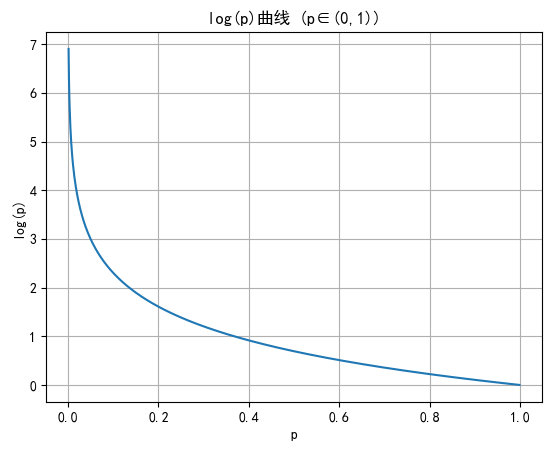

In [ ]:
#真实值是1类别的损失曲线
import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(0.001, 0.999, 1000)  # 避免log(0)和log(1)
logp = -np.log(p)

plt.plot(p, logp)
plt.xlabel('p')
plt.ylabel('log(p)')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置为黑体以显示中文
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号
plt.title('log(p)曲线 (p∈(0,1))')
plt.grid(True)
plt.show()


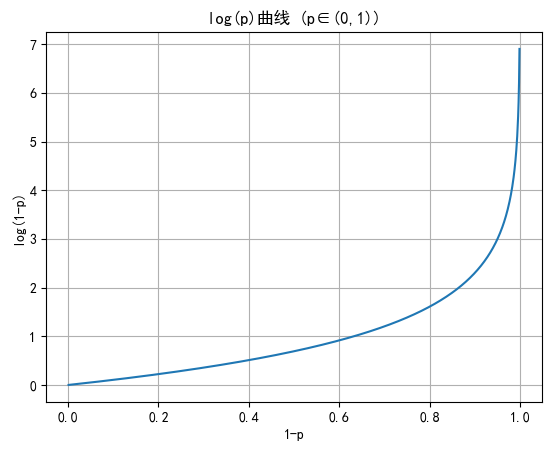

In [4]:
#真实值是0类别的损失曲线
import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(0.001, 0.999, 1000)  # 避免log(0)和log(1)
logp = -np.log(1-p)

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置为黑体以显示中文
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号
plt.plot(p, logp)
plt.xlabel('1-p')
plt.ylabel('log(1-p)')
plt.title('log(p)曲线 (p∈(0,1))')
plt.grid(True)
plt.show()


# 逻辑回归实战癌症二分类问题

In [6]:
import pandas as pd
import numpy as np

# 读取CSV文件，并将'?'替换为np.nan
df = pd.read_csv('data/breast-cancer-wisconsin.csv', header=None, na_values='?')

# 删除包含缺失值的行
df = df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       683 non-null    int64  
 1   1       683 non-null    int64  
 2   2       683 non-null    int64  
 3   3       683 non-null    int64  
 4   4       683 non-null    int64  
 5   5       683 non-null    int64  
 6   6       683 non-null    float64
 7   7       683 non-null    int64  
 8   8       683 non-null    int64  
 9   9       683 non-null    int64  
 10  10      683 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 64.0 KB


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 特征为第1到第9列，标签为第10列
X = df.iloc[:, 1:10].astype(float)
y = df.iloc[:, 10]

# 标签中2表示良性，4表示恶性。我们可以将其转成0/1
y = y.map({2: 0, 4: 1})

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 逻辑回归模型训练
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 评估
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"准确率: {acc:.4f}")
print("分类报告:")
print(classification_report(y_test, y_pred))
print("部分预测 前5行:")
print(y_pred[:5])

# 输出预测概率
y_prob = model.predict_proba(X_test)
print("部分预测概率前5行:") #两列依次 0类别的概率 1类别的概率
print(y_prob[:5])


准确率: 0.9562
分类报告:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        79
           1       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137

部分预测 前5行:
[1 1 0 0 0]
部分预测概率前5行:
[[1.51822822e-02 9.84817718e-01]
 [9.05940817e-05 9.99909406e-01]
 [9.97521748e-01 2.47825177e-03]
 [9.95254891e-01 4.74510895e-03]
 [9.98600907e-01 1.39909266e-03]]
